<a href="https://colab.research.google.com/github/sohaibhassan57/Deep_learning_PIAIC_2020__JUL/blob/master/Dog_cat_dataset_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.2.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Computer Vision*


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data_gen = ImageDataGenerator(rescale=1.0/255)
test_data_gen=ImageDataGenerator(rescale=1.0/255)


In [ ]:
train_data = train_data_gen.flow_from_directory(
    "/content/drive/My Drive/new_small_dataset/train",
    target_size=(150,150),
    batch_size=20,
    class_mode='categorical'
)

test_data=test_data_gen.flow_from_directory("/content/drive/My Drive/new_small_dataset/test",target_size=(150,150),
                                             batch_size=20,class_mode="categorical")


Found 200 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
test_data.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [ ]:
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(2, activation='softmax'))

In [ ]:
model1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
hist = model1.fit(train_data,epochs=50)

Epoch 1/50
10/10 [==============================] - 48s 5s/step - loss: 68.9345 - accuracy: 0.5100
Epoch 2/50
10/10 [==============================] - 1s 82ms/step - loss: 12.1352 - accuracy: 0.6100
Epoch 3/50
10/10 [==============================] - 1s 81ms/step - loss: 7.2376 - accuracy: 0.4950
Epoch 4/50
10/10 [==============================] - 1s 80ms/step - loss: 6.6105 - accuracy: 0.4850
Epoch 5/50
10/10 [==============================] - 1s 79ms/step - loss: 4.5218 - accuracy: 0.5300
Epoch 6/50
10/10 [==============================] - 1s 81ms/step - loss: 4.7198 - accuracy: 0.5450
Epoch 7/50
10/10 [==============================] - 1s 80ms/step - loss: 3.4187 - accuracy: 0.5400
Epoch 8/50
10/10 [==============================] - 1s 82ms/step - loss: 3.2964 - accuracy: 0.6000
Epoch 9/50
10/10 [==============================] - 1s 85ms/step - loss: 4.7516 - accuracy: 0.4900
Epoch 10/50
10/10 [==============================] - 1s 83ms/step - loss: 3.3515 - accuracy: 0.5650
Epoch 11

Found 6 images belonging to 2 classes.


In [ ]:
Y = model1.predict(test_data)


In [18]:
Y

array([[9.8909330e-01, 1.0906740e-02],
       [9.8614675e-01, 1.3853207e-02],
       [3.6356679e-01, 6.3643324e-01],
       [7.9640305e-01, 2.0359696e-01],
       [9.5367181e-01, 4.6328153e-02],
       [9.5992500e-01, 4.0074937e-02],
       [6.3260823e-01, 3.6739171e-01],
       [2.7122217e-01, 7.2877789e-01],
       [9.7825485e-01, 2.1745155e-02],
       [9.9207073e-01, 7.9292916e-03],
       [9.9996531e-01, 3.4713052e-05],
       [8.1823897e-01, 1.8176104e-01],
       [9.7268730e-01, 2.7312683e-02],
       [9.7519398e-01, 2.4806038e-02],
       [9.9507362e-01, 4.9264012e-03],
       [8.8588268e-01, 1.1411737e-01],
       [9.8313808e-01, 1.6861917e-02],
       [9.7637886e-01, 2.3621164e-02],
       [9.5653224e-01, 4.3467708e-02],
       [9.5264101e-01, 4.7359020e-02],
       [7.7691323e-01, 2.2308676e-01],
       [8.7780774e-01, 1.2219233e-01],
       [3.8636717e-01, 6.1363280e-01],
       [9.9093199e-01, 9.0679675e-03],
       [1.9359118e-01, 8.0640882e-01],
       [5.7600868e-01, 4.

In [19]:
len(Y)

40

In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img("/content/drive/My Drive/new_small_dataset/test/cat/cat.50.jpg", target_size=(150,150))
x=image.img_to_array(img) / 255
x = x.reshape(1,-1)
model1.predict(x)

array([[0.877808  , 0.12219204]], dtype=float32)

In [22]:
labels=["cat","dog"]
array=model1.predict(x)
arr=array[0].tolist()
num=arr.index(max(arr))
print("prediction is\"",labels[num],"\"")
print("Probability",max(arr))


prediction is" cat "
Probability 0.8778079748153687


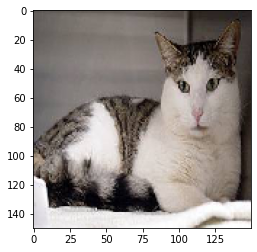

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
img=plt.imshow(img)
plt.show()
